In [1]:
#sparting spark and reading Reddit
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Reddit").getOrCreate()
df = None
df = spark.read.csv("s3a://andrew-bierbaum-insight-test-dataset/Reddit/Reddit_Comments_2018-000000000000.csv.gz", header=True,multiLine=True, escape='"')

In [2]:
#spark.sql.caseSensitive = False
#sqlContext.sql("set spark.sql.caseSensitive=false")

In [3]:
#showing the start of the data and format
df.show(5)
df.printSchema()

+--------------------+------------+--------+----+-------------+-----------------+-----+-----------+------------+---------+----------+-----+------------+----------------+------+-------+--------------+----+-------------+----------------------+
|                body|score_hidden|archived|name|       author|author_flair_text|downs|created_utc|subreddit_id|  link_id| parent_id|score|retrieved_on|controversiality|gilded|     id|     subreddit| ups|distinguished|author_flair_css_class|
+--------------------+------------+--------+----+-------------+-----------------+-----+-----------+------------+---------+----------+-----+------------+----------------+------+-------+--------------+----+-------------+----------------------+
|If you pass NNN y...|        null|   false|null|    [deleted]|             null| null| 1543622400|    t5_2qjpg|t3_a1x20u| t3_a1x20u|    1|  1546258274|               0|     0|eatm39h|         memes|null|         null|                  null|
|One dude one time...|        nu

In [4]:
#Convert spark data to be readable using sql queries
df.createOrReplaceTempView("Reddit")
happy_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '%happy%'")
happy_results.show()

+-----------+--------------------+
|created_utc|                body|
+-----------+--------------------+
| 1543622570|It's kinda funny....|
| 1543622614|You dont seem all...|
| 1543709069|* Classic style /...|
| 1543709074|yh I got no sympa...|
| 1543709077|Okay, finally got...|
| 1543709105|Looked like his t...|
| 1543709111|I just left this ...|
| 1543709140|Cash is always ni...|
| 1543709145|/uj I've been on ...|
| 1543709169|She’s doing reall...|
| 1543709221|Because I had a v...|
| 1544659353|Du und ich zusamm...|
| 1545955332|I agree with you ...|
| 1545955556|That sounds reall...|
| 1544832276|Soon as we get 1....|
| 1544832427|You have no idea ...|
| 1544227371|Absolutely. Such ...|
| 1544227540|Me either, happy ...|
| 1543881709|Huh interesting. ...|
| 1543881718|You will. It’ll t...|
+-----------+--------------------+
only showing top 20 rows



In [5]:
xamarin_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '%xamarin%'")
flutter_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '%flutter%'")
react_native_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '%react native%'")
#cross_xamarin_flutter_results.show()

In [6]:
#collect, convert dates to datetime format for later graphing, and sort data
from datetime import datetime
python_xamarin_results = xamarin_results.collect()
python_xamarin_results_cleaned = [(datetime.fromtimestamp(float(i)),body.encode('ascii',errors='ignore')) for i, body in python_xamarin_results]
python_xamarin_results_cleaned.sort()


In [7]:
#repeat collect, convert dates to datetime format for later graphing, and sort data for flutter results
python_flutter_results = flutter_results.collect()
python_flutter_results_cleaned = [(datetime.fromtimestamp(float(i)),body.encode('ascii',errors='ignore')) for i, body in python_flutter_results]
python_flutter_results_cleaned.sort()

In [8]:
#repeat collect, convert dates to datetime format for later graphing, and sort data for react native results
python_react_native_results = react_native_results.collect()
python_react_native_results_cleaned = [(datetime.fromtimestamp(float(i)),body.encode('ascii',errors='ignore')) for i, body in python_react_native_results]
python_react_native_results_cleaned.sort()

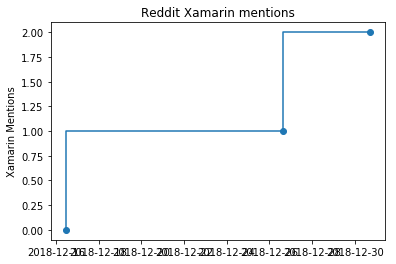

<Figure size 432x288 with 0 Axes>

In [9]:
#sort, number, and then graph the data
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
count = numpy.arange(len(python_xamarin_results_cleaned))
#Date_Data = matplotlib.dates.datestr2num(clean_python_results_utc)
Date_Data = []
Body_Data = []
for date, body in python_xamarin_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('Xamarin Mentions')
matplotlib.pyplot.title('Reddit Xamarin mentions')
plt.show()
plt.savefig('Reddit_xamarin.png')

In [10]:
import pandas
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
pandas_df.to_csv("Reddit_xamarin.csv")
pandas_df

,body,date
0,Had simillar issue with async methods in xamar...,2018-12-16 11:09:01
1,&gt; ok i guess all the java based answers are...,2018-12-26 15:12:11
2,You can hack together a Xamarin.Forms app with...,2018-12-30 17:18:22


In [11]:
#find flutter posts that already contain xamarin and export to csv
pandas_df[pandas_df['body'].str.contains('flutter')].to_csv('Reddit_xamarin_flutter_cross.csv')

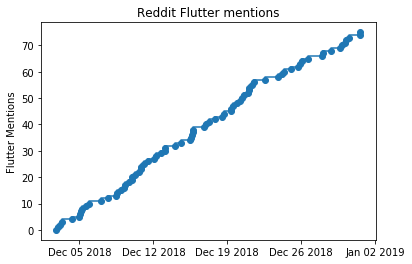

<Figure size 432x288 with 0 Axes>

In [12]:
#repeat graphing and later csv export for flutter
count = numpy.arange(len(python_flutter_results_cleaned))
Date_Data = []
Body_Data = []
for date, body in python_flutter_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('Flutter Mentions')
matplotlib.pyplot.title('Reddit Flutter mentions')
plt.show()
plt.savefig('Reddit_flutter.png')

#print csv for flutter
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
pandas_df.head()
pandas_df.to_csv("Reddit_flutter.csv")

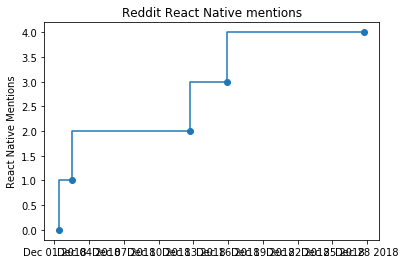

<Figure size 432x288 with 0 Axes>

In [13]:
#repeat graphing and later csv export for react native
count = numpy.arange(len(python_react_native_results_cleaned))
Date_Data = []
Body_Data = []
for date, body in python_react_native_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('React Native Mentions')
matplotlib.pyplot.title('Reddit React Native mentions')
plt.show()
plt.savefig('Redditreact_native.png')

#print csv for flutter
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
pandas_df.head()
pandas_df.to_csv("Reddit_react_native.csv")